# IPL Data Analysis 🏏

This project performs an Exploratory Data Analysis (EDA) of the Indian Premier League (IPL) using multiple datasets covering match details, player performances, team statistics, and more.

### 📁 Dataset Source
The datasets used in this project can be downloaded from [this IPL dataset on Kaggle](https://www.kaggle.com/datasets). Due to GitHub's file size limits, the datasets are not hosted here. Please download them and place them in your local project directory.

### 🛠️ Tech Stack
- Python 🐍
- Pandas
- Matplotlib & Seaborn
- Jupyter Notebook

### 🌟 Project Highlights
- Match-wise and season-wise insights
- Player performance trends (most runs, strike rates)
- Toss decisions and match outcomes
- Team-wise home and away performance analysis
- Visualizations for batting, bowling, and team strategies

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
most_runs = pd.read_csv('most_runs_average_strikerate.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
home_away = pd.read_csv('teamwise_home_and_away.csv')

# Quick peek at the matches data
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 🧹 Data Cleaning

This section handles missing values and prepares the datasets for analysis.

### 📄 1. Cleaning `matches.csv`
- Dropping unnecessary columns (`umpire3`)
- Filling missing values in the `city` column using the `venue` column
- Removing rows where `winner` is missing (indicating abandoned matches)

### 📄 2. Cleaning `deliveries.csv`
- Checking for missing values
- Ensuring consistent datatypes

This step ensures that both key datasets (`matches.csv` and `deliveries.csv`) are ready for further analysis.


In [8]:
# Cleaning matches.csv
matches.drop(columns=['umpire3'], inplace=True)

# Fill missing 'city' values with corresponding 'venue' values
matches['city'].fillna(matches['venue'], inplace=True)

# Drop rows where 'winner' is missing (likely abandoned matches)
matches = matches[matches['winner'].notna()]

# Reset index after dropping
matches.reset_index(drop=True, inplace=True)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\2362477203.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna(matches['venue'], inplace=True)


## 📊 Exploratory Data Analysis (EDA)

In this section, we explore patterns, trends, and insights from the IPL dataset using visualizations and summary statistics.

We'll answer the following key questions:

1. Which team has won the most matches?
2. What is the distribution of match winners by season?
3. What is the toss decision trend across seasons?
4. Which venues have hosted the most matches?
5. How do toss and match winners correlate?
6. Who are the top 10 players with the most Player of the Match awards?


C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\1677190522.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_wins, x='Wins', y='Team', palette='viridis')
C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\1677190522.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HARSHIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


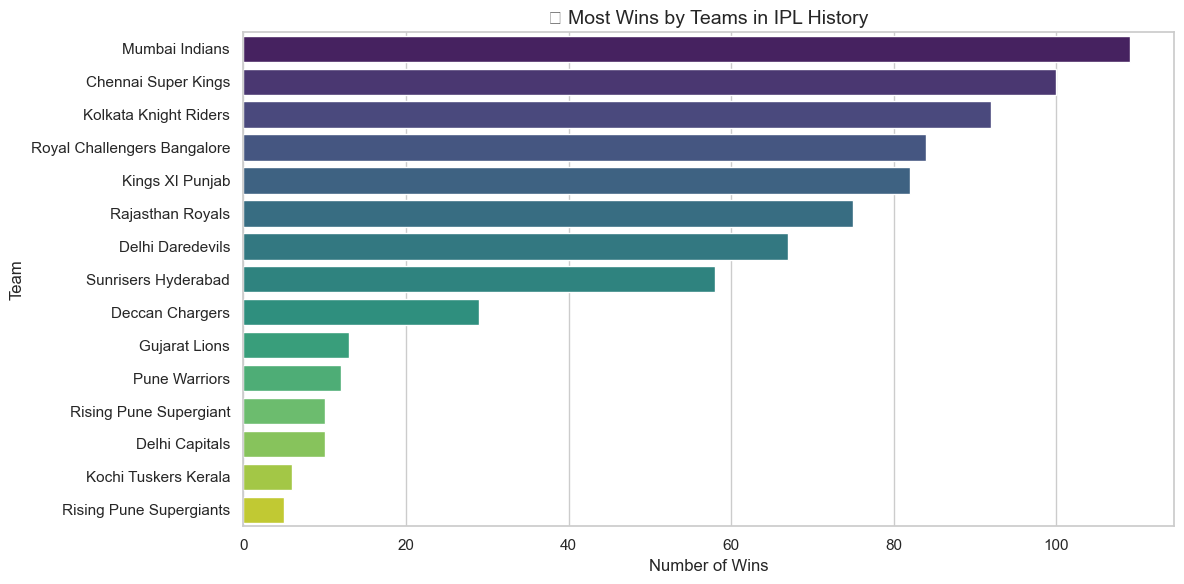

In [9]:
#Q1: Which team has won the most matches?
# Count the number of wins for each team
most_wins = matches['winner'].value_counts().reset_index()
most_wins.columns = ['Team', 'Wins']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=most_wins, x='Wins', y='Team', palette='viridis')
plt.title('🏆 Most Wins by Teams in IPL History', fontsize=14)
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

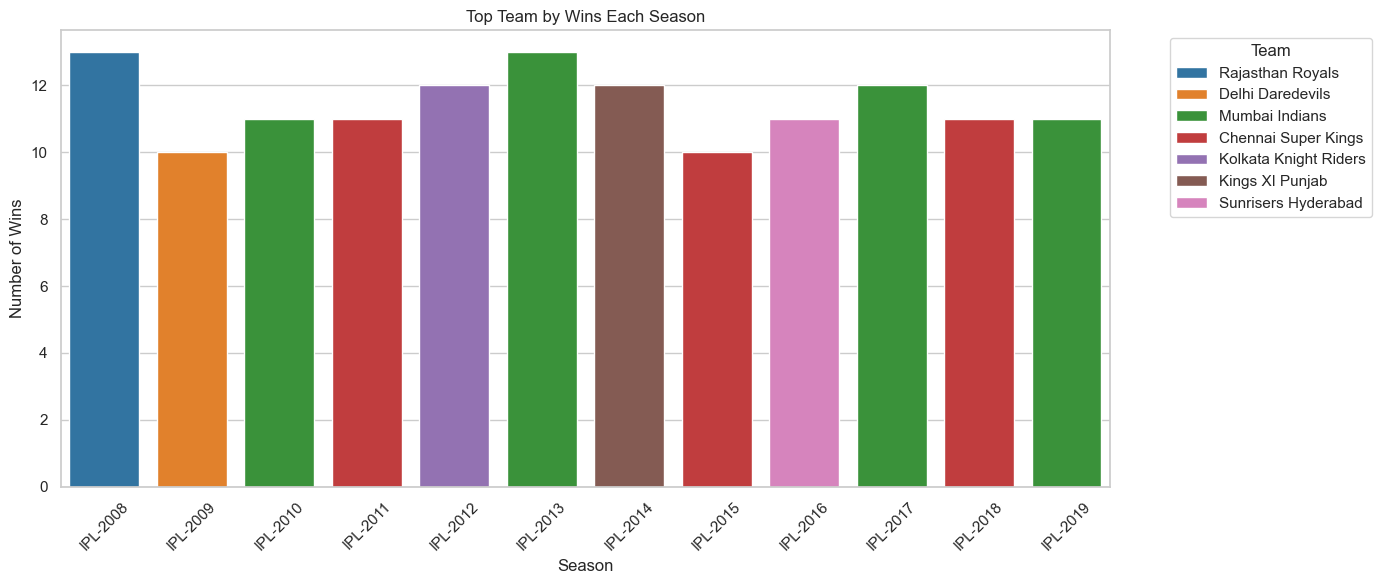

In [17]:
#Which team won the most matches each season?
# Group by season and winner to count wins
season_wins = matches.groupby(['Season', 'winner']).size().reset_index(name='wins')

# For each season, find team with max wins
top_team_per_season = season_wins.loc[season_wins.groupby('Season')['wins'].idxmax()].reset_index(drop=True)

# Plotting
plt.figure(figsize=(14,6))
sns.barplot(data=top_team_per_season, x='Season', y='wins', hue='winner', dodge=False, palette='tab10')
plt.title('Top Team by Wins Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

          batsman  total_runs    average  strikerate
0         V Kohli        5426  35.697368  131.987351
1        SK Raina        5386  33.662500  137.538304
2       RG Sharma        4902  30.447205  130.999466
3       DA Warner        4717  41.377193  143.286756
4        S Dhawan        4601  33.583942  125.538881
5        CH Gayle        4525  41.136364  152.254374
6        MS Dhoni        4450  37.711864  138.802246
7      RV Uthappa        4420  28.333333  130.730553
8  AB de Villiers        4414  42.442308  152.101999
9       G Gambhir        4219  31.485075  124.088235


C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\2433513998.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen, x='batsman', y='total_runs', palette='viridis')


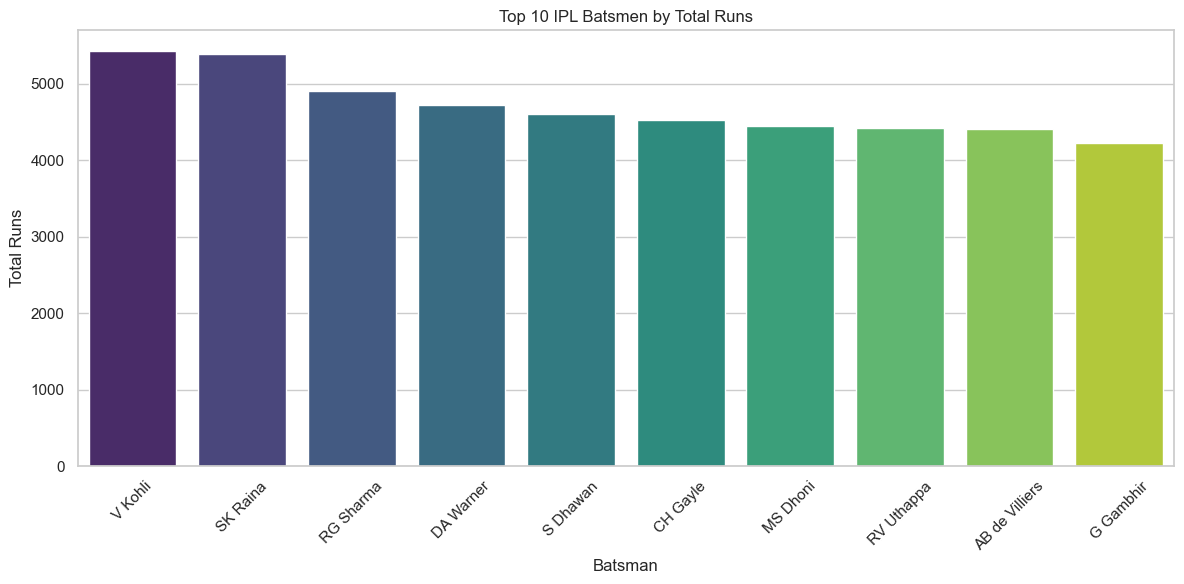

In [22]:
#Top Players by Runs, Strike Rate, and Average
# Convert numeric columns
numeric_cols = ['total_runs', 'out', 'numberofballs', 'average', 'strikerate']
for col in numeric_cols:
    most_runs[col] = pd.to_numeric(most_runs[col], errors='coerce')

# Sort by total_runs and get top 10 batsmen
top_batsmen = most_runs.sort_values('total_runs', ascending=False).head(10)

print(top_batsmen[['batsman', 'total_runs', 'average', 'strikerate']])

# Plot top 10 batsmen by total runs
plt.figure(figsize=(12,6))
sns.barplot(data=top_batsmen, x='batsman', y='total_runs', palette='viridis')
plt.title('Top 10 IPL Batsmen by Total Runs')
plt.xticks(rotation=45)
plt.ylabel('Total Runs')
plt.xlabel('Batsman')
plt.tight_layout()
plt.show()



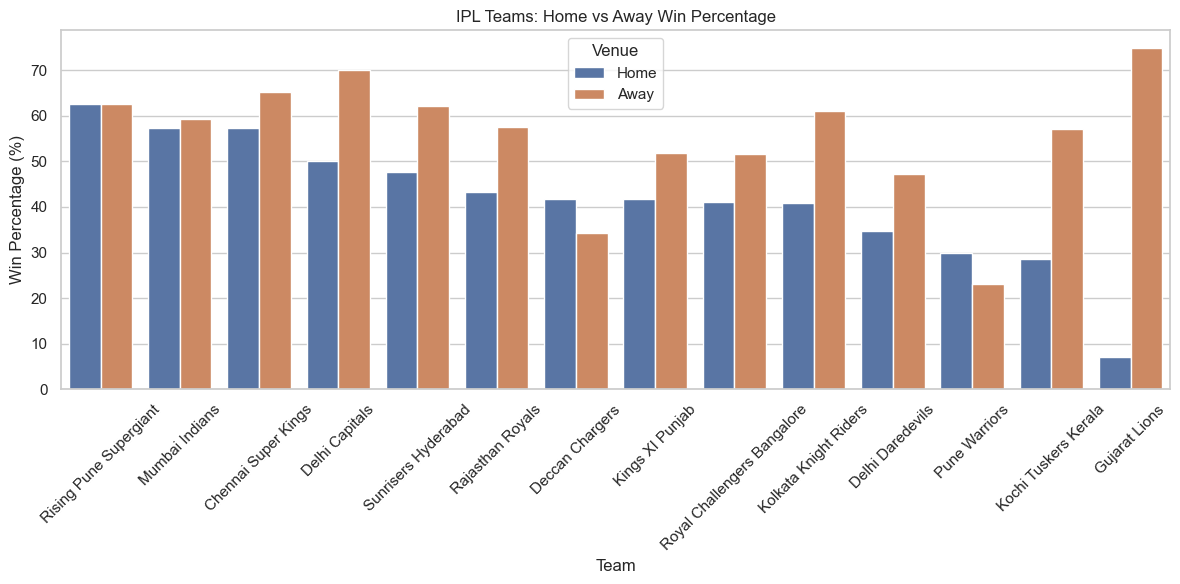

In [32]:
# Plot home and away win percentages side by side for each team
plt.figure(figsize=(12,6))
home_away_melted = home_away.melt(id_vars='team', 
                                  value_vars=['home_win_percentage', 'away_win_percentage'],
                                  var_name='Venue', value_name='Win_Percentage')

# Rename for better legend labels
home_away_melted['Venue'] = home_away_melted['Venue'].map({
    'home_win_percentage': 'Home',
    'away_win_percentage': 'Away'
})

sns.barplot(data=home_away_melted, x='team', y='Win_Percentage', hue='Venue')
plt.title('IPL Teams: Home vs Away Win Percentage')
plt.ylabel('Win Percentage (%)')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.legend(title='Venue')
plt.tight_layout()
plt.show()

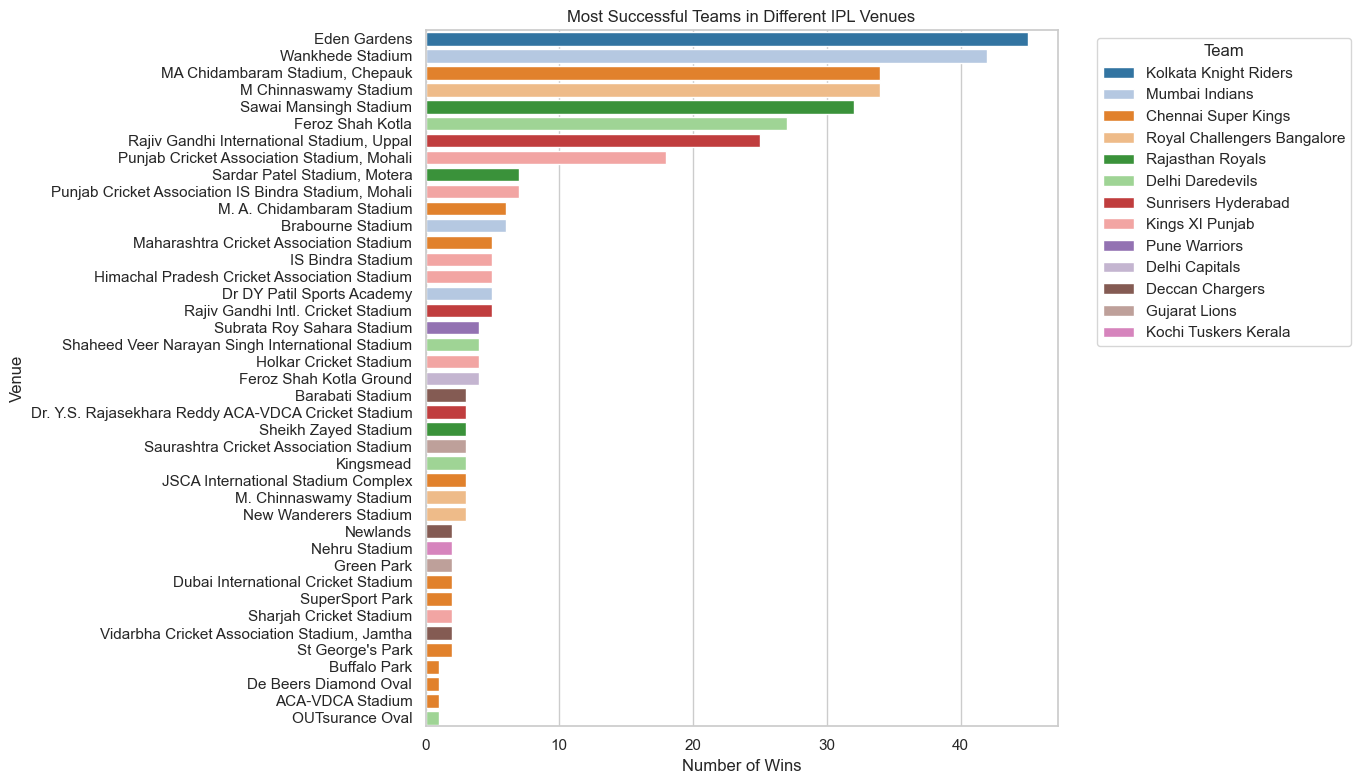

In [35]:
# Filter out matches with no winner (e.g., 'result' may be 'no result')
matches_filtered = matches[matches['winner'].notna()]

# Group by venue and winner and count wins
venue_team_wins = matches_filtered.groupby(['venue', 'winner']).size().reset_index(name='wins')

# Get the top winning team per venue
top_teams_per_venue = venue_team_wins.loc[venue_team_wins.groupby('venue')['wins'].idxmax()]

# Sort venues by number of wins for better visualization
top_teams_per_venue = top_teams_per_venue.sort_values('wins', ascending=False)

# Plot
plt.figure(figsize=(14,8))
sns.barplot(x='wins', y='venue', data=top_teams_per_venue, hue='winner', dodge=False, palette='tab20')

plt.title('Most Successful Teams in Different IPL Venues')
plt.xlabel('Number of Wins')
plt.ylabel('Venue')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\476387485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=top_wicket_takers, palette='viridis')


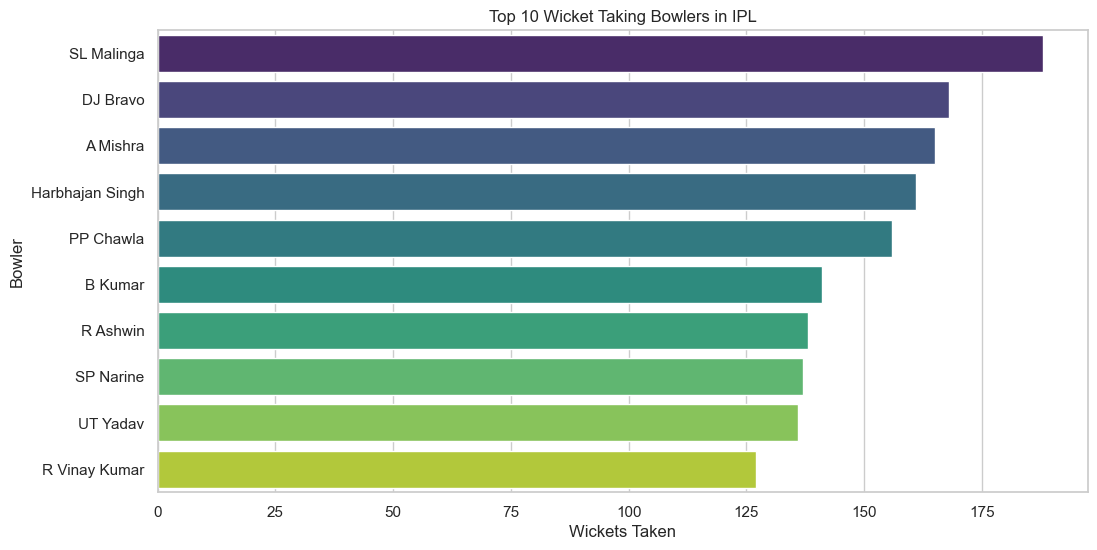

In [38]:
# 1. Most wickets taken by bowlers
# Wicket deliveries have a non-null 'player_dismissed'
wickets = deliveries[deliveries['player_dismissed'].notna()]

# Count wickets by bowler
wickets_per_bowler = wickets['bowler'].value_counts().reset_index()
wickets_per_bowler.columns = ['bowler', 'wickets']

# Top 10 wicket takers
top_wicket_takers = wickets_per_bowler.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='wickets', y='bowler', data=top_wicket_takers, palette='viridis')
plt.title('Top 10 Wicket Taking Bowlers in IPL')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\1430512457.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_batsmen_per_team = player_runs.groupby('batting_team').apply(
C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_15408\1430512457.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bowlers_per_team = player_wickets.groupby('bowling_team').apply(


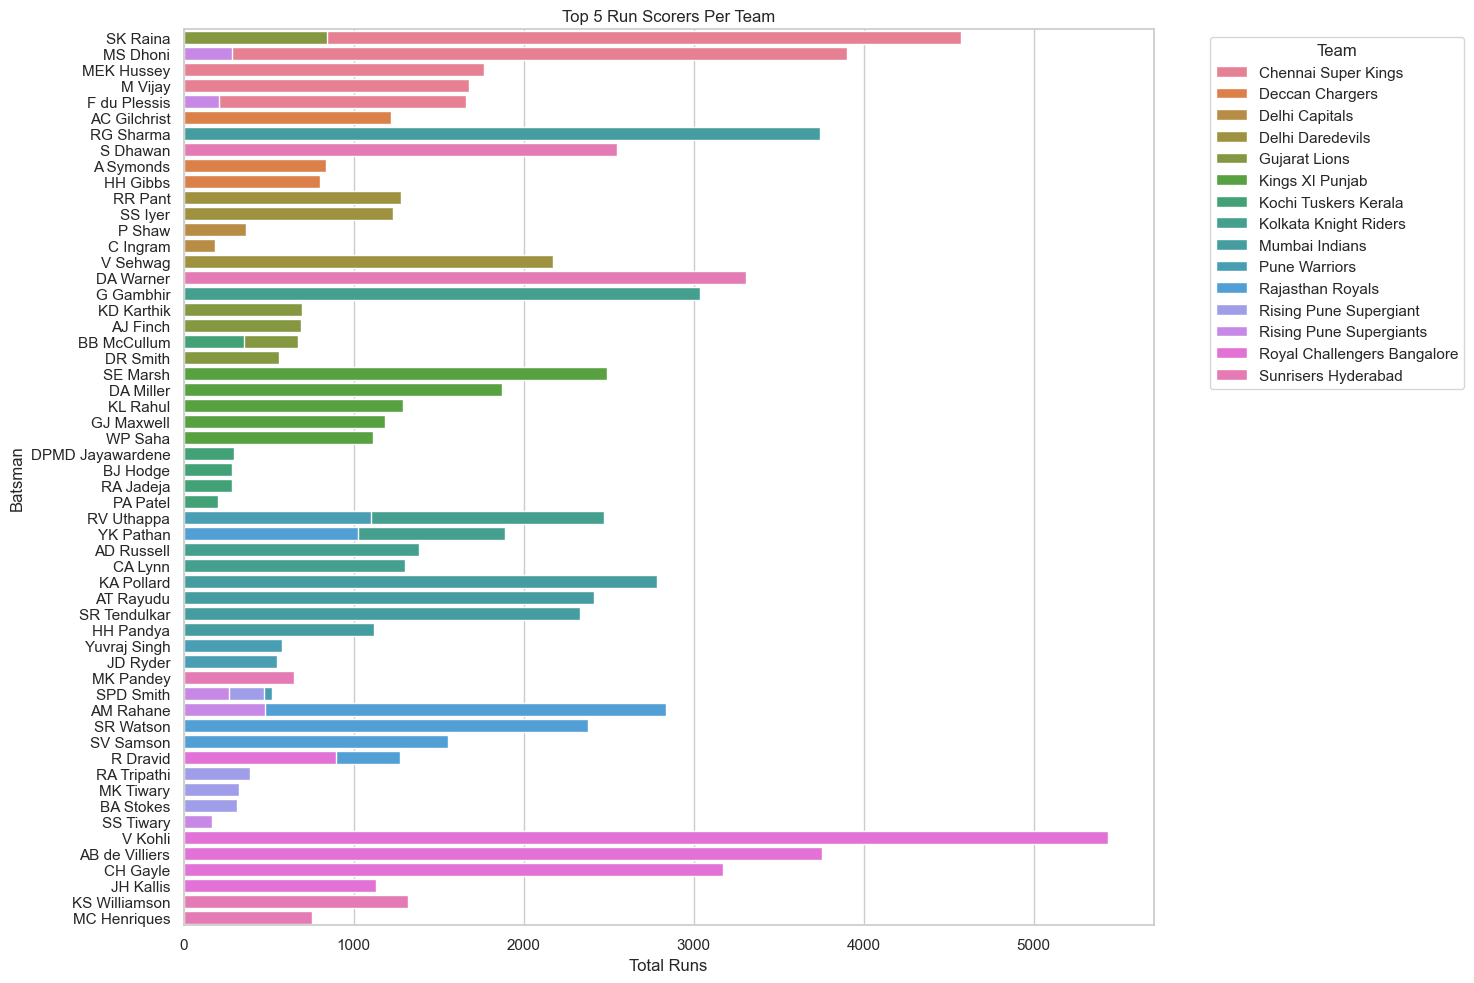

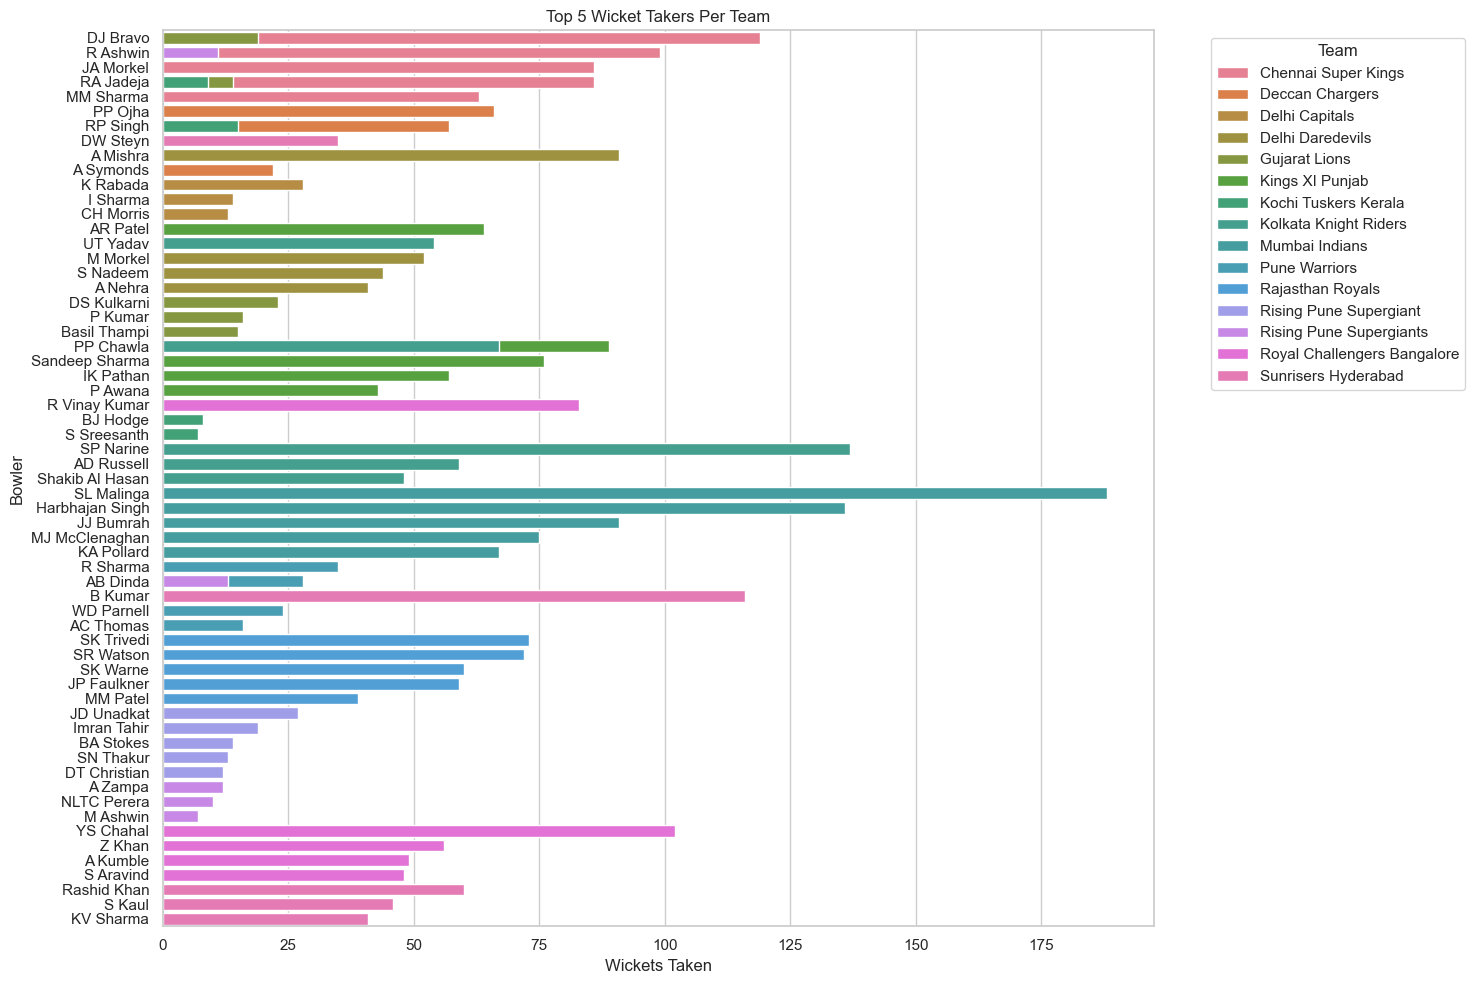

In [39]:
# Step 1: Map match_id to teams from matches.csv
match_teams = matches[['id', 'team1', 'team2']].rename(columns={'id':'match_id'})

# Step 2: Calculate total runs scored by batsmen per match
batsman_runs = deliveries.groupby(['match_id', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

# Step 3: Aggregate total runs by batsman and team over all matches
player_runs = batsman_runs.groupby(['batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

# Step 4: Calculate wickets per bowler per match
# Filter deliveries with a wicket (player_dismissed not null)
wickets = deliveries[deliveries['player_dismissed'].notna()]

# Aggregate wickets by bowling_team and bowler
player_wickets = wickets.groupby(['bowling_team', 'bowler']).size().reset_index(name='wickets')

# Step 5: For each team, find top 5 run scorers
top_batsmen_per_team = player_runs.groupby('batting_team').apply(
    lambda x: x.sort_values('batsman_runs', ascending=False).head(5)).reset_index(drop=True)

# Step 6: For each team, find top 5 wicket takers
top_bowlers_per_team = player_wickets.groupby('bowling_team').apply(
    lambda x: x.sort_values('wickets', ascending=False).head(5)).reset_index(drop=True)

# Step 7: Plotting

# Plot top batsmen per team (only teams with data)
plt.figure(figsize=(15,10))
sns.barplot(x='batsman_runs', y='batsman', hue='batting_team', data=top_batsmen_per_team, dodge=False)
plt.title('Top 5 Run Scorers Per Team')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot top bowlers per team
plt.figure(figsize=(15,10))
sns.barplot(x='wickets', y='bowler', hue='bowling_team', data=top_bowlers_per_team, dodge=False)
plt.title('Top 5 Wicket Takers Per Team')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()